<a href="https://colab.research.google.com/github/ateachment/Moodle-KI/blob/main/xorKNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training of XOR

In [8]:
import numpy as np
import matplotlib.pyplot as plt

### Activation Functions ###

In [9]:
# not suitable
def linear(x):
  return x
def linearDerived(output):
  return 1
def step(x):
  return (x > 0) * 1    # if x > 0 then return 1, else return 0 
def stepDerived(x):
  return (x == 0) * float("inf")    # if x > 0 then return infinite (endless), else return 0 

# suitable
def relu(x):
  return (x > 0) * x    # if x > 0 then return x, else return 0 
def reluDerived(output):
  return output > 0     # if output > 0 then return True, else return False

def sigmoid(x):         
  return 1/(1 + np.exp(-x))
def sigmoidDerived(output):   # derived sigmoid (derive = dt. ableiten)
  return output * (1 - output)

### Training

Randomly initialized weights:
[[-0.21762164 -0.91422226  0.31811849]
 [-0.34958158  0.36973015 -0.59041274]]
[[ 0.215668  ]
 [-0.23910214]
 [-0.39245807]]
Error:1.6719304263949333
Trained weights:
[[-0.20289299 -0.9334218   0.28716028]
 [-0.33478433  0.35049266 -0.62042578]]
[[ 0.17398628]
 [-0.28200193]
 [-0.41439935]]


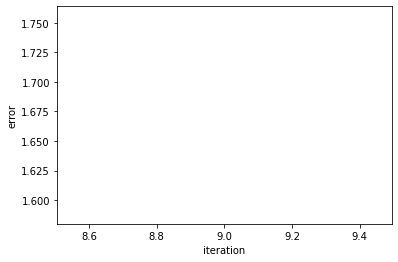

In [42]:
inputs = np.array([[0,0],
                   [0,1],
                   [1,0],
                   [1,1]])

output = np.array([[0,1,1,0]]).T

hidden_size = 3 # hidden layer with 3 neurons

def train(iterations, alpha, activFunc, activFuncDerived):
  weights_0_1 = 2 * np.random.random((2, hidden_size)) - 1   # random -1 <-> +1
  weights_1_2 = 2 * np.random.random((hidden_size, 1)) - 1
  print("Randomly initialized weights:")
  print(weights_0_1)
  print(weights_1_2)

  iterationList = []
  layer_2_errorList = []

  for iteration in range(iterations):
    layer_2_error = 0
    for i in range(len(inputs)):
      layer_0 = inputs[i:i+1]
      z = np.dot(layer_0, weights_0_1)
      layer_1 = activFunc(np.dot(layer_0, weights_0_1))  
      layer_2 = np.dot(layer_1, weights_1_2)
      layer_2_delta = (layer_2 - output[i:i+1])
      layer_1_delta = layer_2_delta.dot(weights_1_2.T * activFuncDerived(layer_1))

      weights_1_2 -= alpha * layer_1.T.dot(layer_2_delta)
      weights_0_1 -= alpha * layer_0.T.dot(layer_1_delta)

      layer_2_error += np.sum(layer_2_delta **2)

    if iteration % 10 == 9:
      print("Error:" + str(layer_2_error))
      iterationList.append(iteration)                   # collect plotting data
      layer_2_errorList.append(layer_2_error)
      plt.plot(iterationList, layer_2_errorList,'r')
      plt.xlabel('iteration')
      plt.ylabel('error')

  print("Trained weights:")
  print(weights_0_1)
  print(weights_1_2)

#train(10, 0.01, linear, linearDerived)       # here no convergence
train(200, 0.8, sigmoid, sigmoidDerived)     # convergence
#train(60, 0.2, relu, reluDerived)            # converges here sometimes if enough positive weights
#train(10, 0.01, step, stepDerived)           # fails always

